# Practice 2: CAMB to generate CMB power spectrum

## Course "Métodos Estadísticos y Numéricos en Cosmología"

##### Rafael Morales Moreno, Maestría en Ciencias (Física), UNAM

## 1. Exercise: Generate CMB and Matter power spectrum C(l), P(k)

We define 3 cosmological models (i.e different values for the cosmological parameters) like:
- **Cosmo 1 :**  Ωcdm = 0.25,   Ωb = 0.05,   ΩΛ = 0.7  and  H0 = 70km.s$^{−1}$/Mpc
- **Cosmo 2 :**  Ωcdm = 0.2,   Ωb = 0.1,   ΩΛ = 0.7  and  H0 = 70km.s$^{−1}$/Mpc
- **Cosmo 3 :**  Ωcdm = 0.3,   Ωb = 0.1,   ΩΛ = 0.7  and  H0 = 70km.s$^{−1}$/Mpc

Produce the $< TT > $ power spectrum for the 3 cosmologies and then compare the results.
You will also plot the $<TE>$, $<EE>$ and $<BB>$.

In [63]:
# Start by importing necessary modules

from math import pi
import numpy as np

import camb
from camb import model, initialpower

In [2]:
# Setting the cosmology models (H_0 in km/s/Mpc)

# model 1
Omega_cdm1, Omega_b1, Omega_L, H_0 = 0.25, 0.05, 0.7, 70 # in km/s/Mpc

# model 2
Omega_cdm2, Omega_b23 = 0.2, 0.1

# model 3
Omega_cdm3 = 0.3

h=H_0/100

In [30]:
ombh2_1 = round(Omega_b1*h**2,4)

ombh2_23 = round(Omega_b23*h**2,4)

omch2_1 = round(Omega_cdm1*h**2,5)

omch2_2 = round(Omega_cdm2*h**2,4)

omch2_3 = round(Omega_cdm3*h**2,4)

omk_3 = round(1 - Omega_L - Omega_b23 - Omega_cdm3,1)

print('The set of parameters are:')
print('MODEL 1: H_0=',H_0,' ombh2=', ombh2_1, 'omch2=', omch2_1, 'omk=', 0)
print('MODEL 2: H_0=',H_0,' ombh2=', ombh2_23, 'omch2=', omch2_2, 'omk=', 0)
print('MODEL 3: H_0=',H_0,' ombh2=', ombh2_23, 'omch2=', omch2_3, 'omk=', omk_3)

The set of parameters are:
MODEL 1: H_0= 70  ombh2= 0.0245 omch2= 0.1225 omk= 0
MODEL 2: H_0= 70  ombh2= 0.049 omch2= 0.098 omk= 0
MODEL 3: H_0= 70  ombh2= 0.049 omch2= 0.147 omk= -0.1


1. Generate 3 structures of parameters (params1, params2, params3) using the pyCAMB **params = camb.CAMBparams(), params.set_cosmology()** and then **InitPower.set_params()**

In [31]:
# Generating three structures of parameter dictionary

params1 = camb.CAMBparams()
params1.set_cosmology(H0=70.0, ombh2=0.0245, omch2=0.1225, omk=0)
params1.InitPower.set_params(As=2e-9, ns=0.965, r=0)
params1.set_for_lmax(2500, lens_potential_accuracy=0);


params2 = camb.CAMBparams()
params2.set_cosmology(H0=70.0, ombh2=0.049, omch2=0.098, omk=0)
params2.InitPower.set_params(As=2e-9, ns=0.965, r=0)
params2.set_for_lmax(2500, lens_potential_accuracy=0);


params3 = camb.CAMBparams()
params3.set_cosmology(H0=70.0, ombh2=0.049, omch2=0.147, omk=-0.1)
params3.InitPower.set_params(As=2e-9, ns=0.965, r=0)
params3.set_for_lmax(2500, lens_potential_accuracy=0);

2. Obtain the CMB power-spectra using the functions: **camb.get_results()** and **get_cmb_power_spectra()**

In [33]:
# Calculating results for each set of these parameters

results1 = camb.get_results(params1)
results2 = camb.get_results(params2)
results3 = camb.get_results(params3)

#getting dictionary of CAMB power spectra (PS)
powers1 =results1.get_cmb_power_spectra(params1, CMB_unit='muK')
powers2 =results2.get_cmb_power_spectra(params2, CMB_unit='muK')
powers3 =results3.get_cmb_power_spectra(params3, CMB_unit='muK')

In [34]:
# Now showing these PS from every set of params. 

for name1 in powers1: print(name1)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


In [35]:
for name2 in powers2: print(name2);

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


In [36]:
for name3 in powers3: print(name3)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


3. Plot the $<TT>$ power spectrum for model 1 and model 2.

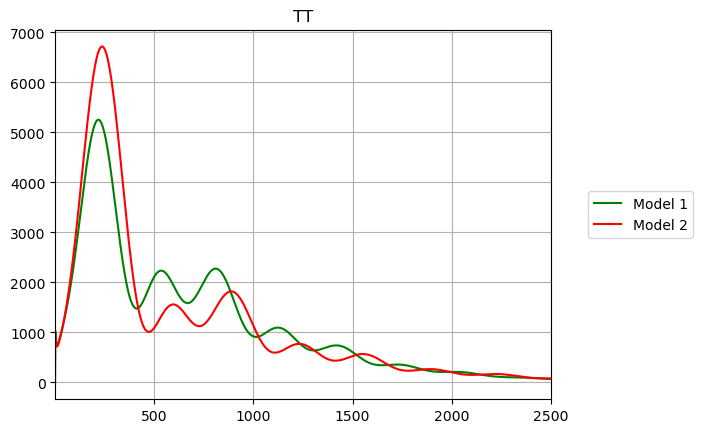

In [52]:
# 3. Plotting CMB <TT> PS for models 1 & 2
import matplotlib
from matplotlib import pyplot as plt

totCL_1 = powers1['total']    # First defining the total PS
totCL_2 = powers2['total']

ls_1 = np.arange(totCL_1.shape[0])  # array of values from 0 to the number of rows (shape[0])
ls_2 = np.arange(totCL_2.shape[0])


plt.plot(ls_1,totCL_1[:,0], color='g',label=r'Model 1')
plt.plot(ls_2,totCL_2[:,0], color='r',label=r'Model 2')

plt.legend(loc='right',bbox_to_anchor=(1.3, 0.5))

plt.title('TT')

plt.xlim([2,2500]);
plt.grid()

# CL arrays zero based (starting at L=0, with L=0,1 entries zero by default)
# CL are ordered as TT, EE, BB, TE (BB=0 for unlensed scalar results).

#### Answers to item 3.

**Are the first peak positions the same? Why?**

The peaks of each Spectrum are not in the same position of x-axis ($\ell$).

Specifically, the **first peak** of the model 2 is higher and located at a larger value in x. This is due to a model with bigger values of $\mathbf{\Omega_b h^2}$ yields a higher oscilation and its spectrum is right shifted. It is also known that a smallest value of $\mathbf{\Omega_c h^2}$ produces a larger oscilation.

**If you compare the relative position of the 2nd and 3rd peaks of the model 1 and the model 2, what do you notice? Give the interpretation following the lecture.**

Second model's peaks are deplaced (right shifted) due to the lower quantity of dark matter. Also, the relative position of the 2nd & 3rd peak between model 1 & 2 seems to be elongated/stretched out to the right (higher values of $\ell$). This is explained for the same reason: having a higher value of barionic matter and smaller value of dark matter, the spectrum peaks are right-shifted.

4. Plot the $<TT>$ power spectrum for model 1 and model 3. Are the first peak positions the same? Why?

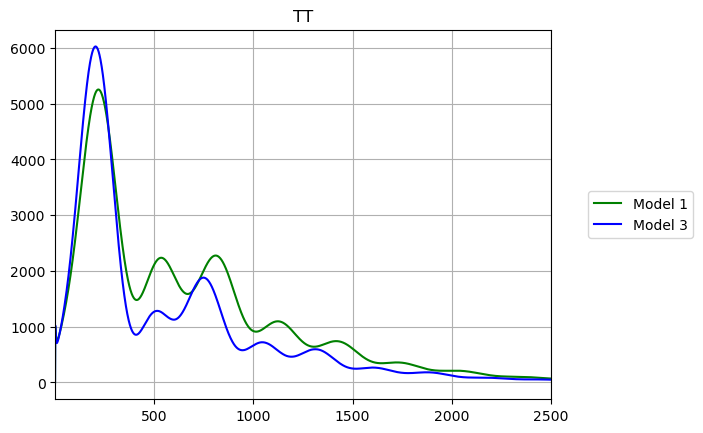

In [57]:
# 4. Making similar process for <TT> PS of model 1 & 3

totCL_1 = powers1['total']
totCL_3 = powers3['total']  # Now compared to model 3

ls_1 = np.arange(totCL_1.shape[0])  # array of values from 0 to the number of rows (shape[0])
ls_3 = np.arange(totCL_3.shape[0])


plt.plot(ls_1,totCL_1[:,0], color='g',label=r'Model 1')
plt.plot(ls_3,totCL_3[:,0], color='b',label=r'Model 3')

plt.legend(loc='right',bbox_to_anchor=(1.3, 0.5))

plt.title('TT')

plt.xlim([2,2500]);
plt.grid()

**Answer to question 4. Are the first peak positions the same? Why?**

We have to notice that the value of dark matter is higher in the third model, as same as the baryonic matter is too. This results in a higher and left-sifted first peak on model 3 regarding to model 1. 

5. Plot the $<EE>$, $<BB>$ and $<TE>$ power spectra for the 3 models.

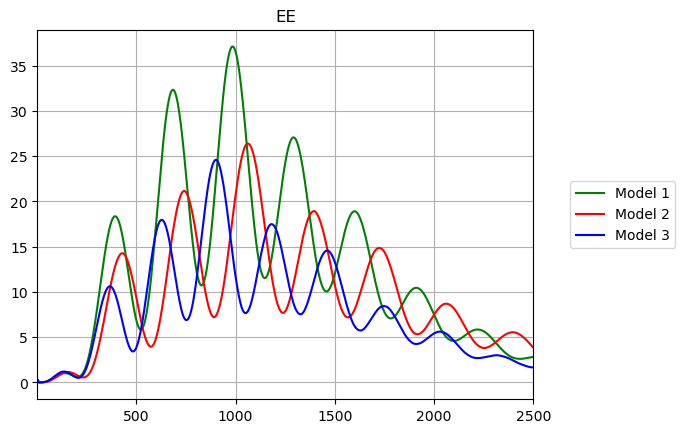

In [58]:
# 5. Plotting CMB <EE> PS for all models

totCL_1 = powers1['total']
totCL_2 = powers2['total']
totCL_3 = powers3['total']

ls_1 = np.arange(totCL_1.shape[0])
ls_2 = np.arange(totCL_2.shape[0])
ls_3 = np.arange(totCL_3.shape[0])


plt.plot(ls_1,totCL_1[:,1], color='g',label=r'Model 1')
plt.plot(ls_2,totCL_2[:,1], color='r',label=r'Model 2')
plt.plot(ls_3,totCL_3[:,1], color='b',label=r'Model 3')

plt.legend(loc='right',bbox_to_anchor=(1.3, 0.5))

plt.title('EE')

plt.xlim([2,2500]);
plt.grid()

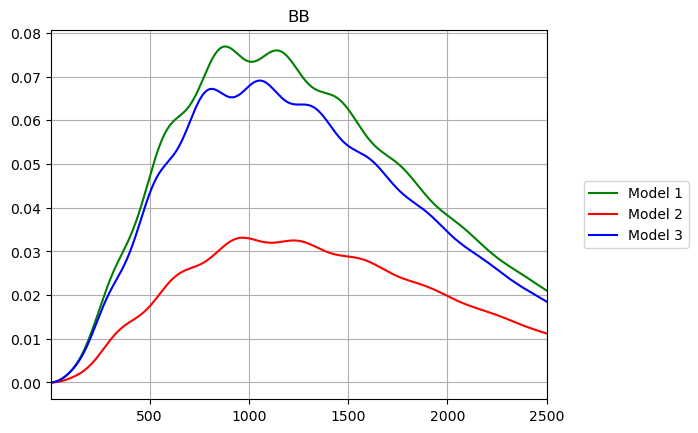

In [59]:
# Analogously to <BB>

totCL_1 = powers1['total']
totCL_2 = powers2['total']
totCL_3 = powers3['total']

ls_1 = np.arange(totCL_1.shape[0])
ls_2 = np.arange(totCL_2.shape[0])
ls_3 = np.arange(totCL_3.shape[0])


plt.plot(ls_1,totCL_1[:,2], color='g',label=r'Model 1')
plt.plot(ls_2,totCL_2[:,2], color='r',label=r'Model 2')
plt.plot(ls_3,totCL_3[:,2], color='b',label=r'Model 3')

plt.legend(loc='right',bbox_to_anchor=(1.3, 0.5))

plt.title('BB')

plt.xlim([2,2500]);
plt.grid()

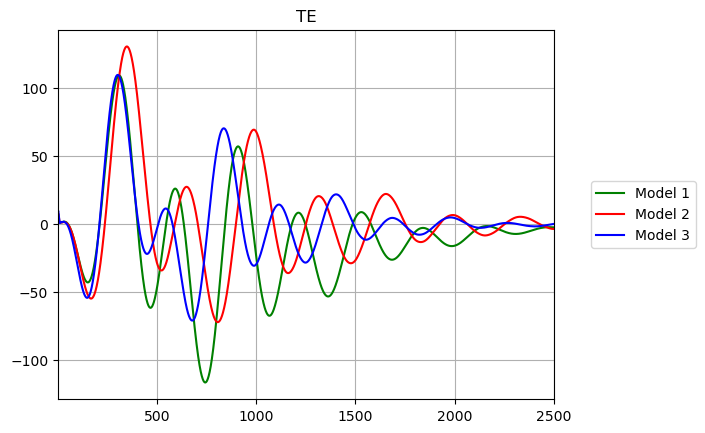

In [60]:
# Plotting CMB <EE> PS for all models

totCL_1 = powers1['total']
totCL_2 = powers2['total']
totCL_3 = powers3['total']

ls_1 = np.arange(totCL_1.shape[0])
ls_2 = np.arange(totCL_2.shape[0])
ls_3 = np.arange(totCL_3.shape[0])


plt.plot(ls_1,totCL_1[:,3], color='g',label=r'Model 1')
plt.plot(ls_2,totCL_2[:,3], color='r',label=r'Model 2')
plt.plot(ls_3,totCL_3[:,3], color='b',label=r'Model 3')

plt.legend(loc='right',bbox_to_anchor=(1.3, 0.5))

plt.title('TE')

plt.xlim([2,2500]);
plt.grid()

6. Do the plot of the Matter Power Spectrum for the 3 cosmologies at z = 1.

In [64]:
# Using the same cosmology (i.e., models CAMBparams "params1, 2 & 3") and InitPower

# setting matter PS parameters for Z=1

params1.set_matter_power(redshifts=[1.0], kmax=2.0)
params2.set_matter_power(redshifts=[1.0], kmax=2.0)
params3.set_matter_power(redshifts=[1.0], kmax=2.0)

# For the Linear Matter PS 
params1.NonLinear = model.NonLinear_none
results1 = camb.get_results(params1)
kh1, z1, pk1 = results1.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
#s8 = np.array(results.get_sigma8())

params2.NonLinear = model.NonLinear_none
results2 = camb.get_results(params2)
kh2, z2, pk2 = results2.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

params3.NonLinear = model.NonLinear_none
results3 = camb.get_results(params3)
kh3, z3, pk3 = results3.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

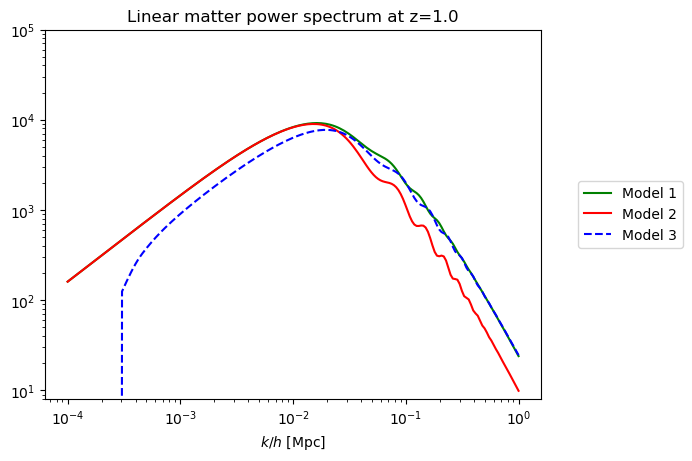

In [71]:
# Plots

for i, (redshift, line) in enumerate(zip(z1,['-'])):
    plt.loglog(kh1, pk1[i,:], color='g', ls = line, label=r'Model 1')


for j, (redshift, line) in enumerate(zip(z2,['-'])):
    plt.loglog(kh2, pk2[j,:], color='r', ls = line, label=r'Model 2')


for k, (redshift, line) in enumerate(zip(z3,['--'])):
    plt.loglog(kh3, pk3[k,:], color='b', ls = line, label=r'Model 3')

plt.legend(loc='right',bbox_to_anchor=(1.3, 0.5))
plt.ylim(8,1e+5)
plt.title('Linear matter power spectrum at z=1.0');
plt.xlabel('$k/h$ [Mpc]');

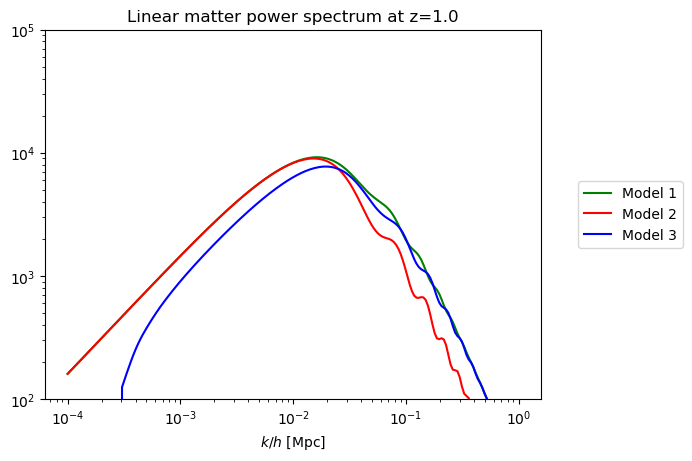

In [72]:
for i, (redshift, line) in enumerate(zip(z1,['-'])):
    plt.loglog(kh1, pk1[i,:], color='g', ls = line, label=r'Model 1')


for j, (redshift, line) in enumerate(zip(z2,['-'])):
    plt.loglog(kh2, pk2[j,:], color='r', ls = line, label=r'Model 2')


for k, (redshift, line) in enumerate(zip(z3,['-'])):
    plt.loglog(kh3, pk3[k,:], color='b', ls = line, label=r'Model 3')

plt.legend(loc='right',bbox_to_anchor=(1.3, 0.5))
plt.ylim(100,1e+5)
plt.title('Linear matter power spectrum at z=1.0');
plt.xlabel('$k/h$ [Mpc]');